## Description

### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                  



In [209]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import seaborn as sns

In [210]:
import tensorflow as tf

In [211]:
print(tf.__version__)

2.6.0


In [212]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
#Defining the path of the dataset
project_path = '/content/drive/My Drive/'
dataset_file = project_path + 'ML/bank.csv'

In [214]:
data_raw = pd.read_csv(dataset_file)

In [215]:
data = data_raw.copy()

In [216]:
data.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4791,4792,15746461,Taylor,709,Spain,Male,35,2,0.00,2,1,0,104982.39,0
7256,7257,15585928,Hay,821,Germany,Female,31,2,68927.57,1,1,1,25445.00,0
5343,5344,15578238,Calabrese,727,France,Male,47,7,0.00,2,1,0,193305.35,0
322,323,15694408,Lung,749,France,Male,40,1,139290.41,1,1,0,182855.42,1
3533,3534,15808557,Mancini,695,France,Female,42,5,0.00,1,0,1,72172.13,1
1451,1452,15684198,McDonald,551,France,Female,38,10,0.00,2,1,1,216.27,0
8523,8524,15567778,Genovese,690,Germany,Female,54,1,144027.80,1,1,1,108731.02,1
967,968,15720893,Gilbert,637,Spain,Female,34,9,0.00,2,0,0,26057.08,0
366,367,15633537,Nolan,540,Germany,Female,42,9,87271.41,2,1,0,172572.64,0
5444,5445,15641794,Ridley,698,France,Male,33,5,135658.73,2,0,1,39755.00,0


In [217]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the data set')

There are 10000 rows and 14 columns in the data set


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [219]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There are no missing values in the dataset

In [220]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Observations

1. RowNumber and CustomerId are specific to customer and can removed from the dataset 
2. Age column looks normally distributed.
3. Tenure column looks normally distributed.
4. HasCrCard, IsActiveMember and Exited columns should be categorical.

In [221]:
# Remove Rownumber, CustomerId, Surname columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [222]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [223]:
# Check if the data set is balanced
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### Observations
1. Dataset is highly imbalanced. There are only 2037 exampples for class 1 where as there are 7963 examples for class 0
2. We should account for class imbalance while building the model

In [224]:
cat_col = ['HasCrCard', 'IsActiveMember', 'Exited']
for col in cat_col:
    data[col] = data[col].astype('category')

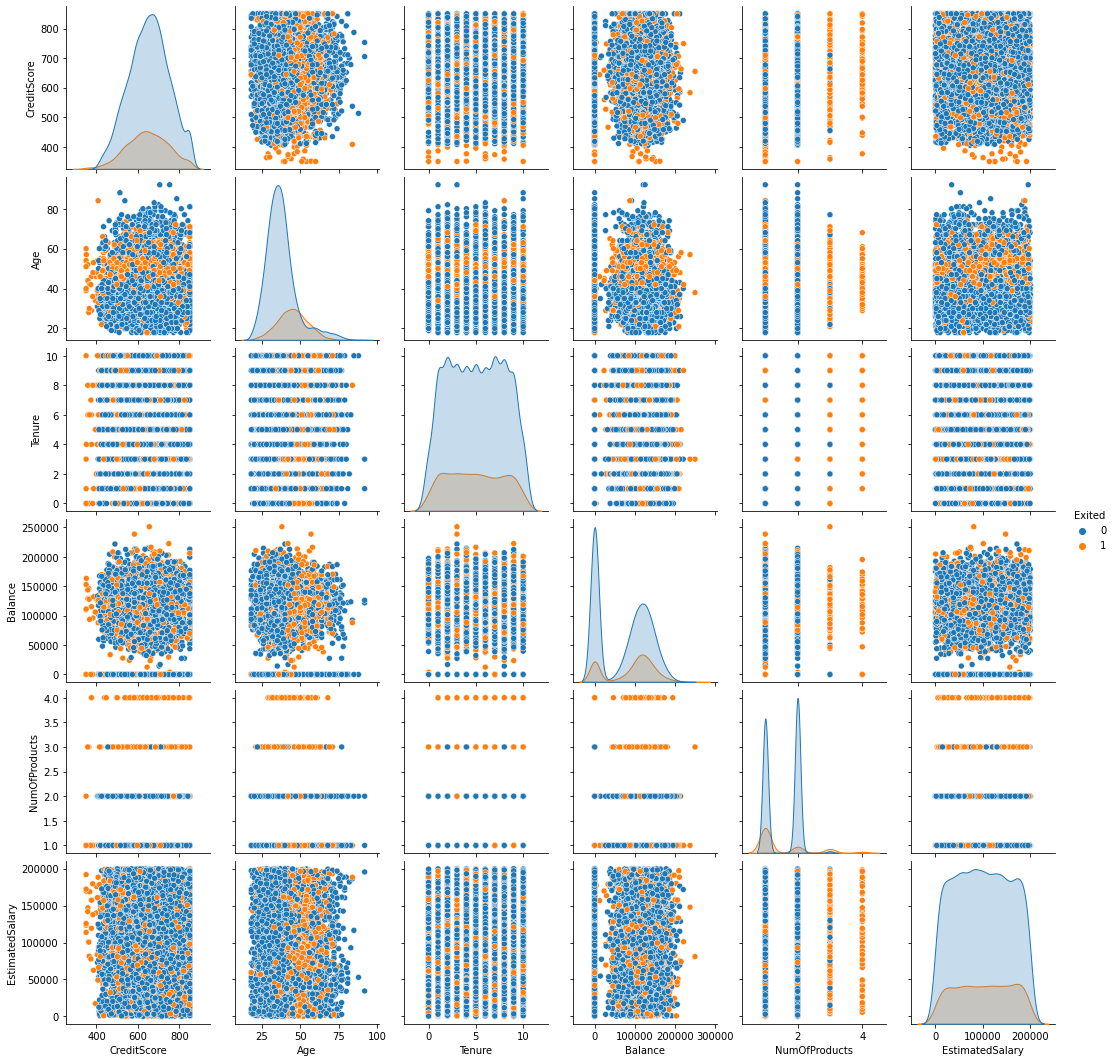

In [225]:
 sns.pairplot(data, hue='Exited')

#### Observations
1. Credit score is normally distributed
2. Credit score is generally lower for exited customers
3. Middle aged customers are more likely to exit
4. Tenure for exited customers is lower. 
5. Number of products purchased by exited customers looks a bit higher

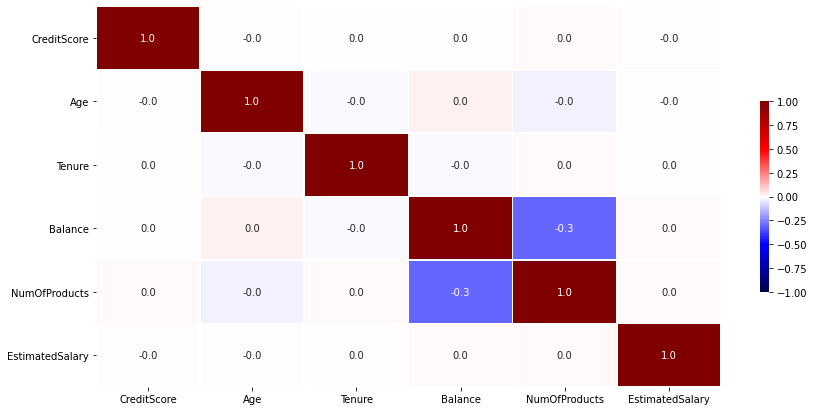

In [226]:
# Correlation
numeric_col = data.select_dtypes(include=np.number).columns
corr = data[numeric_col].corr()
fig, ax = plt.subplots(figsize=(14, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

#### Observations
1. There are really no interesting correlations among variables in the data

In [227]:
data.shape

(10000, 11)

#### Train-Test split

In [228]:
X_data = data.iloc[:, 0:10]
y_data = data.iloc[:, -1]

In [229]:
print(y_data.shape)
print(X_data.shape)

(10000,)
(10000, 10)


In [230]:
X_data = pd.get_dummies(drop_first=True, data=X_data)

In [231]:
X_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,1,0,1,1


In [232]:
# Standardize the data
# using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(X_data)
X_data = pd.DataFrame(data=data_norm, columns=X_data.columns)

In [233]:
X_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
0,0.538,0.324324,0.2,0.000000,0.000000,0.506735,0.0,0.0,0.0,1.0,1.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.562709,0.0,1.0,0.0,0.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,0.569654,0.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.469120,0.0,0.0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,0.395400,0.0,1.0,0.0,1.0,1.0


In [234]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [235]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [236]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [237]:
import seaborn as sn
def print_confusion_matrix(X_test, y_test, model, threshold=0.5):
  y_pred1 = model.predict(X_test)
  for i in range(len(y_test)):
      if y_pred1[i]>threshold:
          y_pred1[i]=1 
      else:
          y_pred1[i]=0



  cm2=confusion_matrix(y_test, y_pred1)
  labels = ['True Negative','False Positive','False Negative','True Positive']
  categories = [ 'Not_Exited','Exited']
  make_confusion_matrix(cm2, 
                        group_names=labels,
                        categories=categories, 
                        cmap='Blues')

In [238]:
def plot_train_val_loss(history):
  hist  = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  # Plotting accuracy at different epochs
  plt.plot(hist['loss'])
  plt.plot(hist['val_loss'])
  plt.legend(("train" , "valid") , loc =0)

# Build the model

## Model evaluation criterion

### Model can make wrong predictions as:
* Case 1: Predicting a customer doesn't leave the bank but they leave
* Case 2: Predicting a customer leaves the bank but they don't

### Which case is more important? 
* Case 1 is more important. Bank will lose a customer in this case resulting in loss to the bank

### How to reduce this loss i.e need to reduce False Negative?
* Company  would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the Bank can identify all the customers who might leave.

In [239]:
# Initialize the model
model = Sequential()

In [240]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=6, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model.add(Dense(units=8,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
# Adding the output layer
# we have an output of 1 node, which is the the desired dimensions of our output (exited or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))   

In [241]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [242]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 56        
_________________________________________________________________
dropout_22 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_40 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
________________________________________________________

In [243]:

#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 1s 2ms/step - loss: 0.5046 - accuracy: 0.7986 - val_loss: 0.4952 - val_accuracy: 0.7894
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4836 - accuracy: 0.7986 - val_loss: 0.4894 - val_accuracy: 0.7894
Epoch 3/10
427/427 [==============================] - 1s 1ms/step - loss: 0.4745 - accuracy: 0.7986 - val_loss: 0.4850 - val_accuracy: 0.7894
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4691 - accuracy: 0.7986 - val_loss: 0.4777 - val_accuracy: 0.7894
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4632 - accuracy: 0.7986 - val_loss: 0.4719 - val_accuracy: 0.7894
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4536 - accuracy: 0.8023 - val_loss: 0.4660 - val_accuracy: 0.7956
Epoch 7/10
427/427 [==============================] - 1s 1ms/step - loss: 0.4491 - accuracy: 0.8055 - val_loss: 0.4594 - val_accuracy: 0.8037
Epoch 

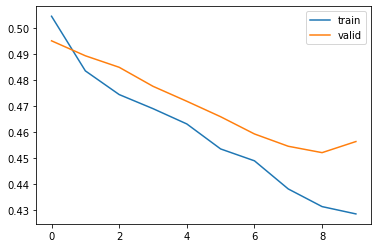

In [244]:
# Capturing learning history per epoch
plot_train_val_loss(history)


In [245]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8175


#### Model evaluation

In [246]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8175


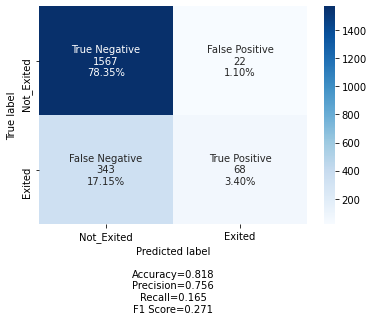

In [247]:
print_confusion_matrix(X_test, y_test, model)

### Observations
1. Recall is very low
2. We did not consider class imbalance into account when we built this model. 
3. Accuracy is also not good

Let's try to improve the model

### Ideas to improve the model
1. We can increase the number of epochs because the loss isn't flat after 10 epochs
2. Use the class weights paramater to account for class imbalance
3. We can try playing around with the number of hidden layers and neurons
4. Change the threshold. The threshold is 0.5 now but we can choose the best threshold using ROC curve.

#### Idea 1: Increase the number of epochs

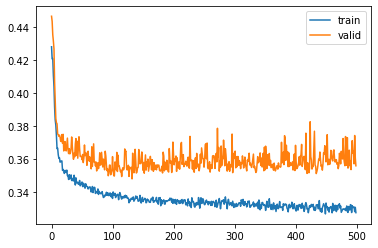

In [248]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=500,validation_split=0.2, verbose=0)
# Capturing learning history per epoch
plot_train_val_loss(history)


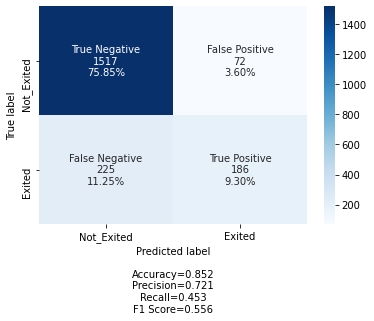

In [249]:
print_confusion_matrix(X_test, y_test, model)

1. Recall and accuracy has improved a lot by increasing the number of epochs. Increasing the number of epochs helped to flatten the loss curve

#### Idea 2: Use the class weights parameter

In [250]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.627549419516787, 1: 2.4600246002460024}

In [251]:
history=model.fit(X_train,y_train,batch_size=75 ,epochs=500,validation_split=0.2, verbose=0, class_weight=class_weights)

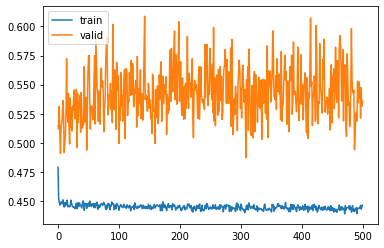

In [252]:
plot_train_val_loss(history)

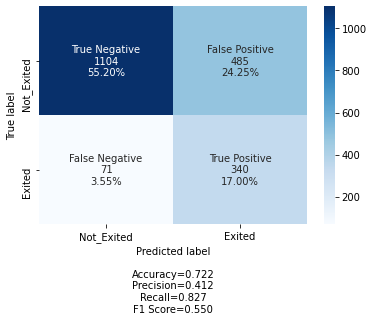

In [253]:
print_confusion_matrix(X_test, y_test, model)

* There is a significant increase in recall after using class weights

#### Idea 3: Use ROC curve to find the right threshold

In [254]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

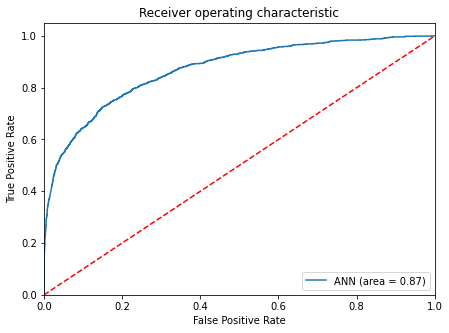

In [255]:
roc_auc_train = roc_auc_score(y_train, model.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, model.predict(X_train))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

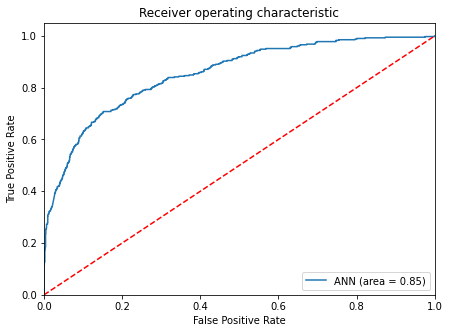

In [256]:
roc_auc_train = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [257]:
from sklearn import metrics
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict(X_test))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.65242684


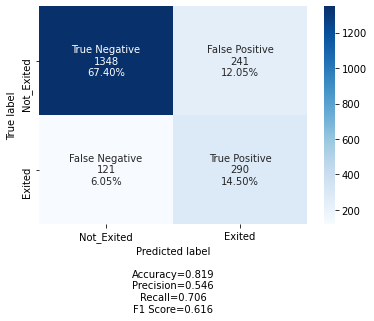

In [258]:
print_confusion_matrix(X_test, y_test, model, optimal_threshold)

* Recall has decreased after using the optimal threshold but the precision and F1 score has increased. 

#### Try using SGD as the optimizer

In [259]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.005),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size=75 ,epochs=500,validation_split=0.2, verbose=0, class_weight=class_weights)

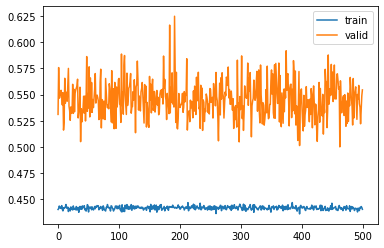

In [260]:
plot_train_val_loss(history)

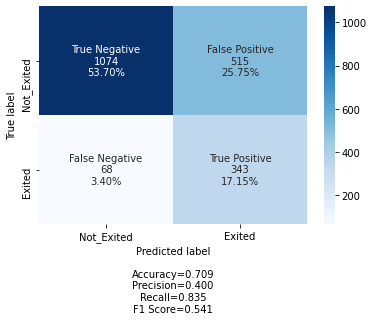

In [261]:
print_confusion_matrix(X_test, y_test, model)

* Recall is much better than previous model with SGD as the optimizer

#### Thresold tuning on model with SGD optimizer

0.67231286


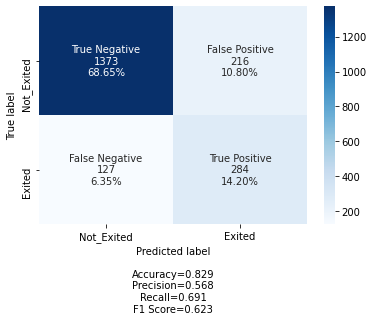

In [262]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict(X_test))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)
print_confusion_matrix(X_test, y_test, model, optimal_threshold)

* Recall has decreased after using the optimal threshold but the precision and F1 score has increased. 

### Try with a different model architecture

In [263]:
#Training Multi-layer perceptron with 3 hidden layers

#adding earlystopping callback
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                            verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(20, input_shape=(11, ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(25, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(25, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=70, epochs=500, shuffle=True, verbose=0, class_weight=class_weights)


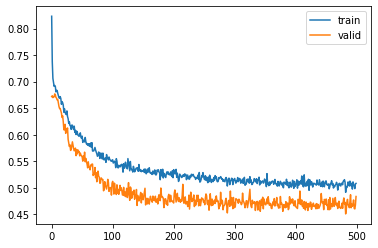

In [264]:
plot_train_val_loss(his_mod2)

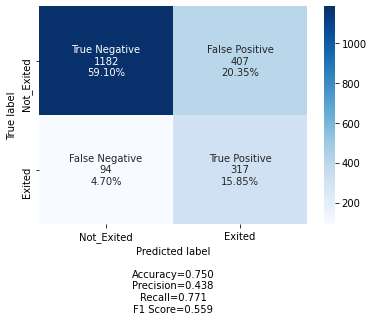

In [265]:
print_confusion_matrix(X_test, y_test, Model2)

* Performance is not better compared to previous models

0.5905967


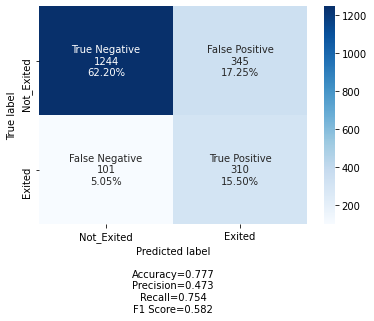

In [266]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, Model2.predict(X_test))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)
print_confusion_matrix(X_test, y_test, model, optimal_threshold)

* Recall has decreased a bit but other there is improvement in other metrics

### Conclusion

1. Performance has increased with increase in the number of epochs from 10 to 500.
2. Model performance has increased significantly when class weights were taken into consideration
3. Recall decreased when optimal threshold from ROC curve is used. Other metrics improved though.
4. Recall is much better when SGD optimizer is used
5. If I have to choose a model, I would choose model 1 with SDG optimizer which produced 0.835 recall